### Import necessary libraries

In [1]:
# Basic Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

mainData = pd.read_csv('clean_filter_dataframe.csv')
sb.set() # set the default Seaborn style for graphics
mainData.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
count,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,...,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000
mean,2007.369579,0.260723,0.139294,0.037282,0.048949,0.486453,70.496872,28.914995,7.216677,129.731607,...,0.089105,0.082848,0.073355,0.063646,0.064941,0.048975,0.035599,0.034736,0.027184,0.028263
std,4.069156,0.276439,0.183665,0.117220,0.068543,0.465979,12.903368,18.224541,1.381018,426.797953,...,0.284925,0.275682,0.260746,0.244148,0.246448,0.215839,0.185307,0.183129,0.162638,0.165742
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,21.000000,3.000000,0.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.070000,0.020000,0.000000,0.010000,0.140000,63.000000,15.000000,6.500000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.160000,0.060000,0.000000,0.020000,0.320000,72.000000,25.000000,7.500000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.360000,0.190000,0.010000,0.060000,0.690000,80.000000,40.000000,8.200000,77.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,1.820000,1.580000,1.490000,1.180000,2.070000,98.000000,106.000000,9.600000,10665.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
data = mainData.drop(["Name", 'Developer', 'Publisher', 'Rating', 'Platform', 'Genre'],axis=1)
data.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,2005.0,1.77,0.12,0.02,0.17,2.07,72.0,21.0,7.8,54.0,...,0,0,0,0,0,0,0,0,0,0
1,2006.0,0.92,0.93,0.00,0.22,2.07,49.0,5.0,5.2,24.0,...,0,0,0,0,0,0,0,0,0,0
2,2007.0,1.35,0.52,0.00,0.19,2.07,73.0,16.0,7.1,27.0,...,1,0,0,0,0,0,0,0,0,0
3,2014.0,0.36,1.38,0.02,0.31,2.07,71.0,85.0,6.1,1571.0,...,0,0,0,0,0,0,0,1,0,0
4,2009.0,1.48,0.39,0.00,0.19,2.06,83.0,68.0,7.9,51.0,...,0,0,1,0,0,0,0,0,0,0


### Random Forest

Random Forest Regression is a supervised learning algorithm that consists of a lot of decision trees that help to output the mean of prediction of the individual trees. The reason that the random forest model works so well is because a large number of relatively uncorrelated trees operating as a committee will outperform any of the individual constituent models.

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9205838330159224
Mean Squared Error (MSE) 	: 0.016795144718932068

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.41728064863815395
Mean Squared Error (MSE) 	: 0.13883987646806903



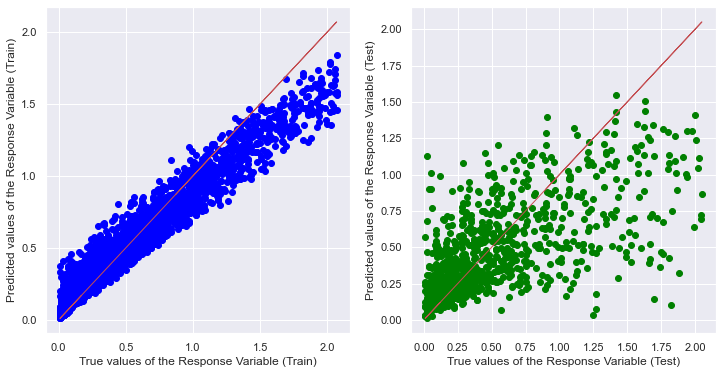

In [3]:
mainData_dummies = data
mainData_dummies.iloc[:,5:].head(5)
import numpy as np# Labels are the values we want to predict
labels = np.array(mainData_dummies['Global_Sales'])# Remove the labels from the features
# axis 1 refers to the columns
mainData_dummies=  mainData_dummies.drop('Global_Sales', axis = 1)# Saving feature names for later use
mainData_dummies = mainData_dummies.drop("NA_Sales", axis = 1)
mainData_dummies = mainData_dummies.drop("EU_Sales", axis = 1)
mainData_dummies = mainData_dummies.drop("JP_Sales", axis = 1)
mainData_dummies = mainData_dummies.drop("Other_Sales", axis = 1)

mainData_list = list(mainData_dummies.columns)# Convert to numpy array
mainData_dummies = np.array(mainData_dummies)
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mainData_dummies, labels, test_size = 0.20, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(X_train, y_train); 

# Predict Total values corresponding to HP
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

As shown here, the train dataset had produced a very good model as the R squared value almost close to 1. However, the test dataset did not do as well with a R squared of 0.41 only. There is a huge difference in the R squared values between the train and test set. We learned that is because the model was overfitted to the train data set. 

Overfitting means that the regression model has become tailored to fit every single point in the dataset rather than reflecting the overall population. This was why the r squared of the train dataset was high but when the model was used on the test data set, the r squared of the test data set was very low. Hence, we decided to use regularisation to calibrate the machine learning model in order to minimise the adjusted loss function and prevent overfitting. 